<a href="https://colab.research.google.com/github/Ritwik7999/Data-Science-Notebooks/blob/master/handwritten_digit_recognition_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Introduction to Keras and MNIST

For background, please review
https://en.wikipedia.org/wiki/MNIST_database




### Getting the data

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
help(mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
  

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Understanding the data and data shapes

Let's have a look at the training data:

In [ ]:
type (train_images)

numpy.ndarray

In [ ]:
train_images.shape
# 60K images, each image is a two-dimensional (28 x 28 array)

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels[0]

5

In [ ]:
train_images[0].shape # dimensions of a single image

(28, 28)

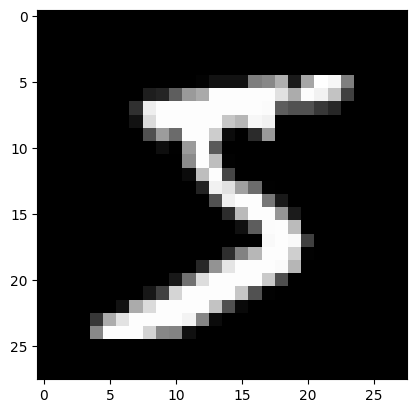

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')

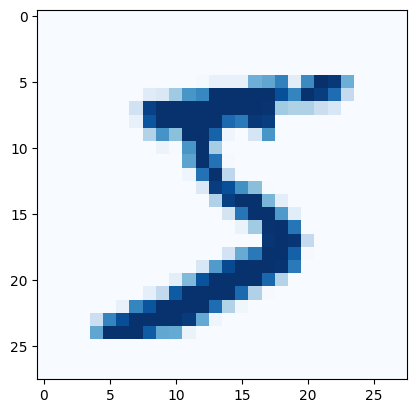

In [ ]:
plt.imshow(train_images[0], cmap='Blues')

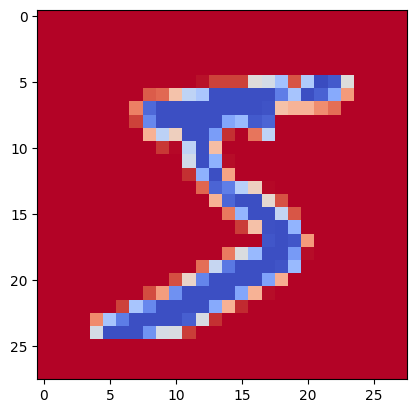

In [ ]:
plt.imshow(train_images[0], cmap='coolwarm_r')

In [ ]:
import numpy as np

with np.printoptions(linewidth=np.inf):
    print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
train_images[0].shape  # the shape of the first image

(28, 28)

In [ ]:
type (train_images[0])

numpy.ndarray

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_labels[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Feature Transformation


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in
the `[0, 1]` range.

Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` withvalues in the `[0, 255]` interval.

We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [ ]:
# Note the value of the original pixels is between 0 and 255
# We will flatten and scale the dataset to a value between 0 and 1

image_height, image_width = 28, 28

train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((60000, image_height * image_width))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((10000, image_height * image_width))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
np.unique(train_images)

array([0.0000000e+00, 1.5378702e-05, 3.0757405e-05, 4.6136101e-05,
       6.1514809e-05, 7.6893506e-05, 9.2272203e-05, 1.0765091e-04,
       1.2302962e-04, 1.3840832e-04, 1.5378701e-04, 1.6916571e-04,
       1.8454441e-04, 1.9992310e-04, 2.1530181e-04, 2.3068051e-04,
       2.4605924e-04, 2.6143793e-04, 2.7681663e-04, 2.9219533e-04,
       3.0757402e-04, 3.2295272e-04, 3.3833142e-04, 3.5371011e-04,
       3.6908881e-04, 3.8446751e-04, 3.9984621e-04, 4.1522493e-04,
       4.3060363e-04, 4.4598232e-04, 4.6136102e-04, 4.7673972e-04,
       4.9211847e-04, 5.0749717e-04, 5.2287587e-04, 5.3825456e-04,
       5.5363326e-04, 5.6901196e-04, 5.8439065e-04, 5.9976935e-04,
       6.1514805e-04, 6.3052675e-04, 6.4590544e-04, 6.6128414e-04,
       6.7666284e-04, 6.9204153e-04, 7.0742023e-04, 7.2279893e-04,
       7.3817762e-04, 7.5355632e-04, 7.6893502e-04, 7.8431371e-04,
       7.9969241e-04, 8.1507111e-04, 8.3044986e-04, 8.4582856e-04,
       8.6120726e-04, 8.7658595e-04, 8.9196465e-04, 9.0734335e

In [ ]:
train_images.shape

(60000, 784)

### One-hot encoding label data

We also need to categorically encode the labels:

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
test_labels.shape

(10000, 10)

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
train_labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
train_images.shape

(60000, 784)



## Build the network


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # fully connected neural network

network = Sequential()

# First layer of the neural network model
#Dense - fully connected node
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))

#Note the output is 10, representing the 10 different digits (class labels 0 - 9)
network.add(Dense(10, activation='softmax'))

In [ ]:
network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the network


In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Train the network

In [ ]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1685 - loss: 2.2807
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5477 - loss: 1.8878
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7130 - loss: 1.1738
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7982 - loss: 0.8117
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8301 - loss: 0.6415


## Check test accuracy

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8248 - loss: 0.6099
